In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams['figure.figsize'] = (12, 12)

In [13]:
data = np.load("clusterable_data.npy")

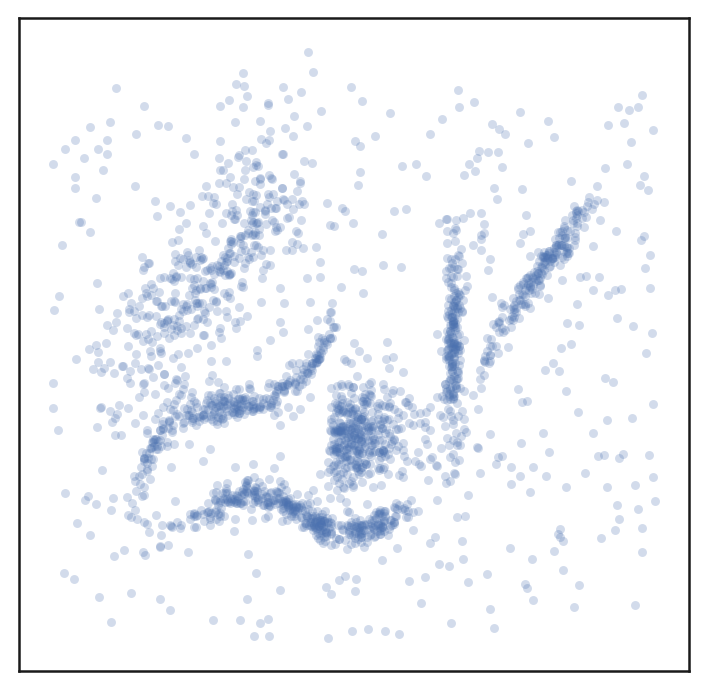

In [14]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

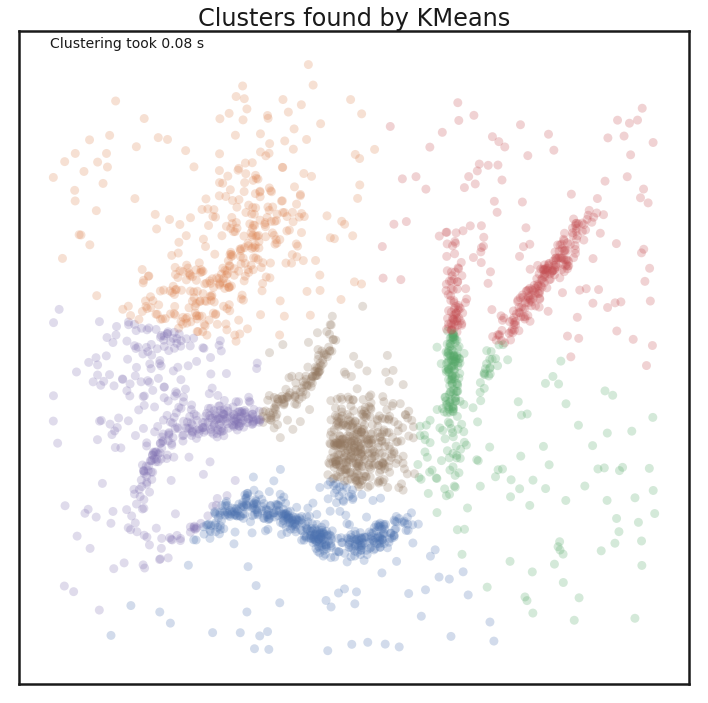

In [29]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

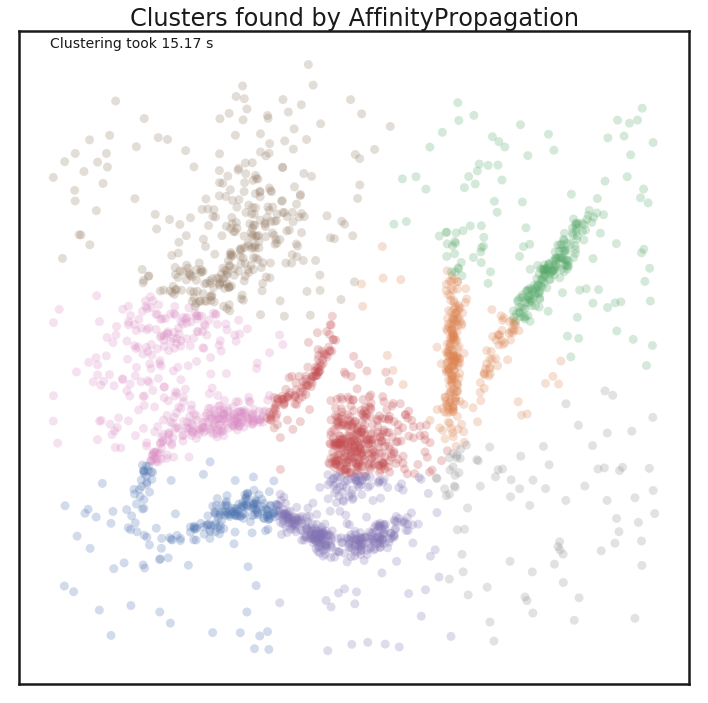

In [30]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

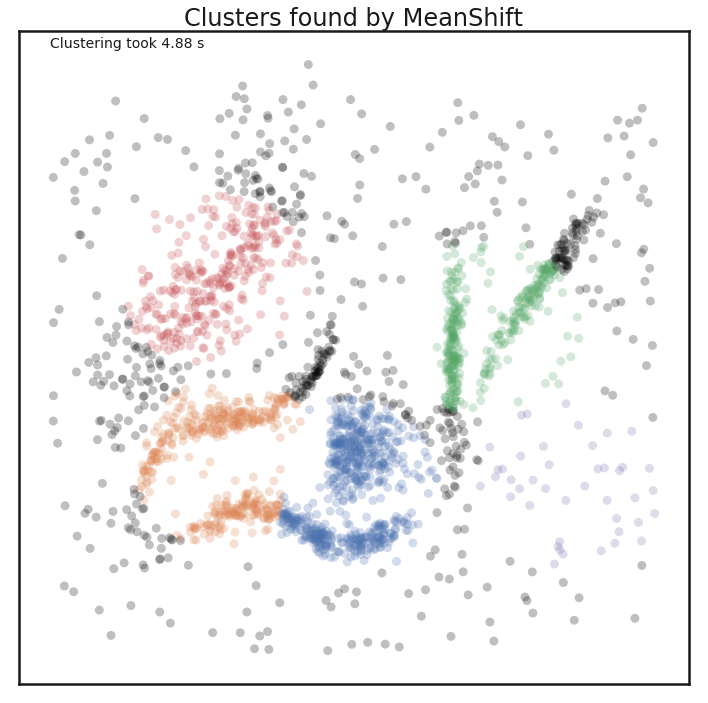

In [31]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

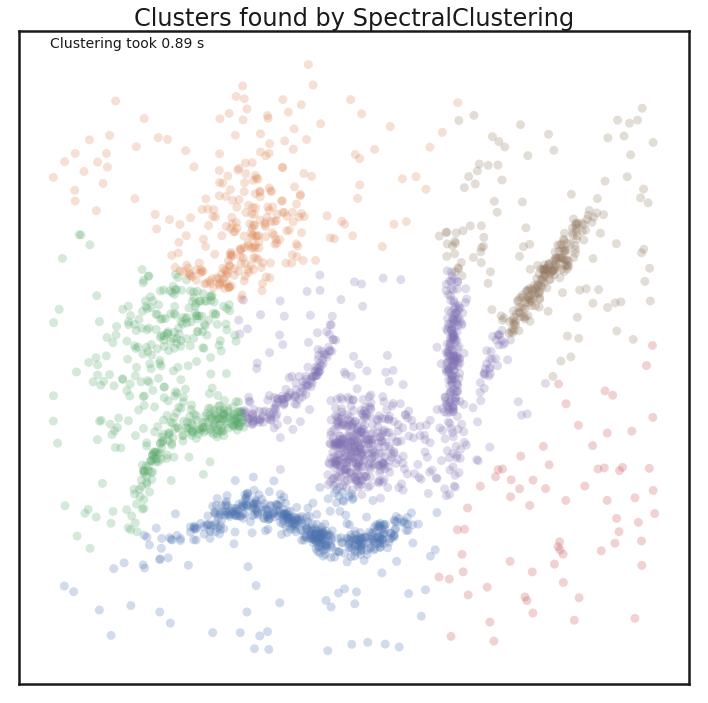

In [32]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

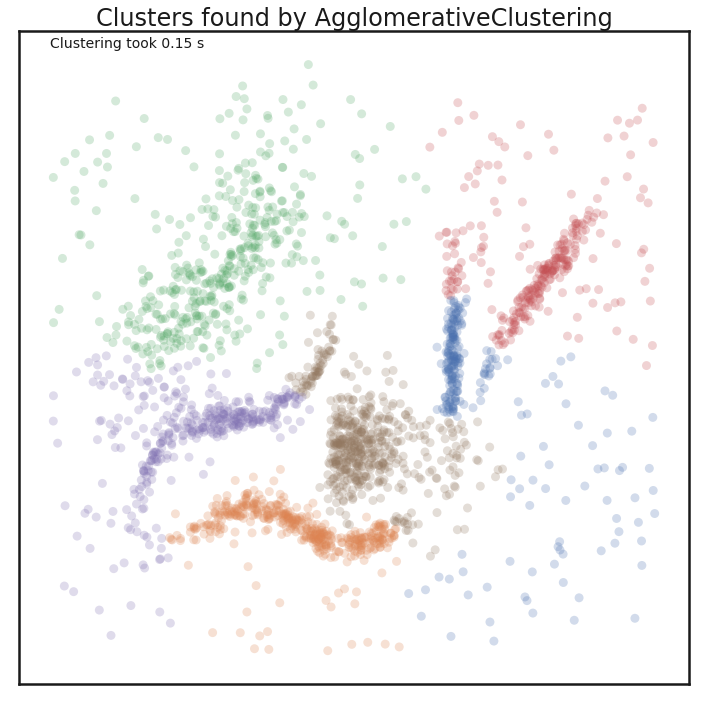

In [33]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

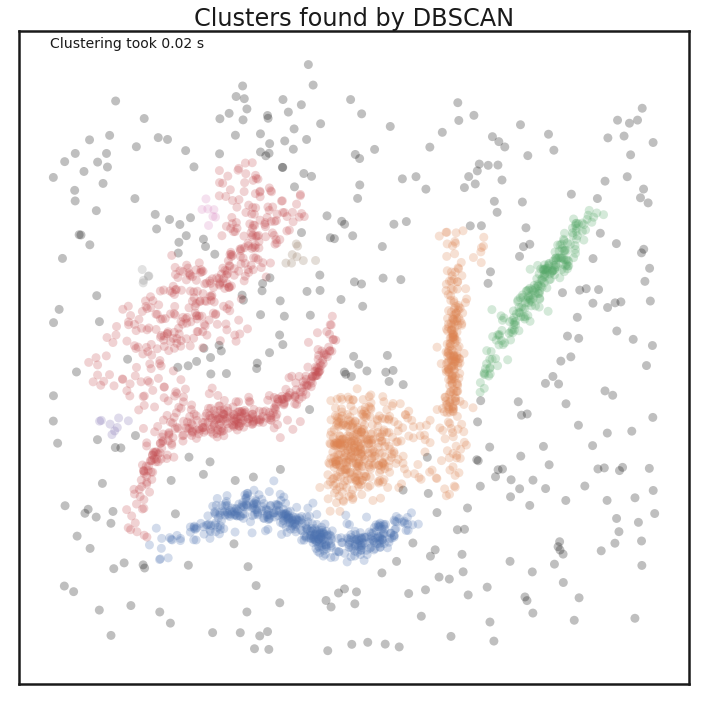

In [34]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [38]:
import hdbscan

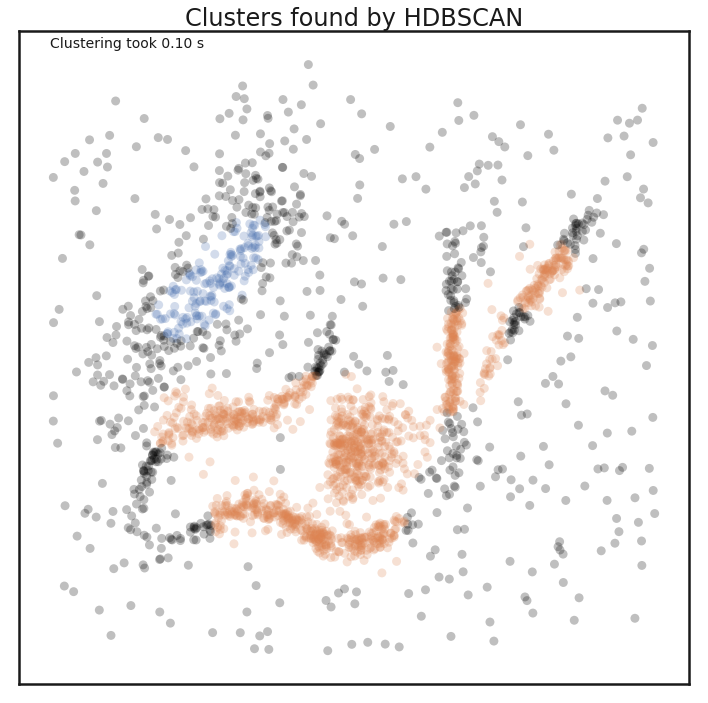

In [178]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':8  })

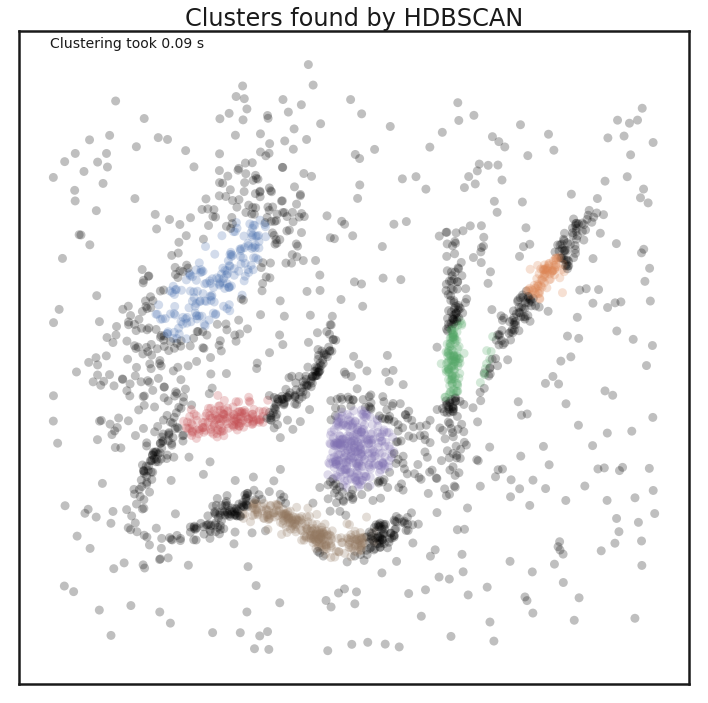

In [189]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15 , 'min_samples':120 , 'alpha':500.9})

In [1]:
import pandas as pd 
# importamos el archivo 
data = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')

sample = data.sample(frac=0.05)

In [2]:
sample.shape

(31565, 14)

In [3]:
X = np.array(sample[[ 'SALDO_PROMEDIO' ,'ROTACION_CARTERA']] )
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':220})

NameError: name 'np' is not defined

In [55]:
clusterer.labels_

array([ 958,   -1,   27, ..., 1253,   -1, 1282], dtype=int64)

(1000, 90000)

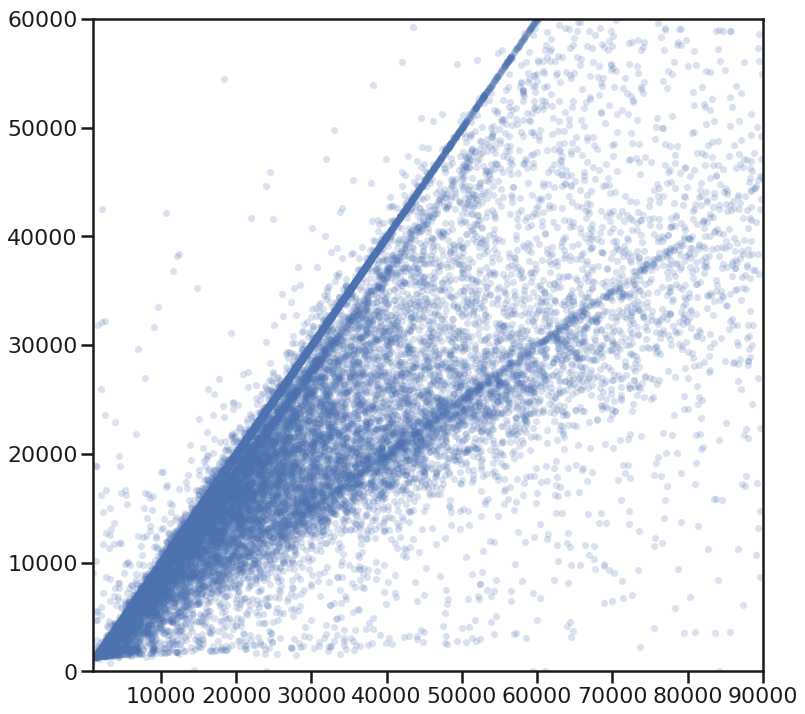

In [67]:
#saldo * facturacion
plt.scatter(*X.T, s=50, linewidth=0, c='b', alpha=0.2)
plt.ylim(0,60000)
plt.xlim(1000,90000)

(0, 100000)

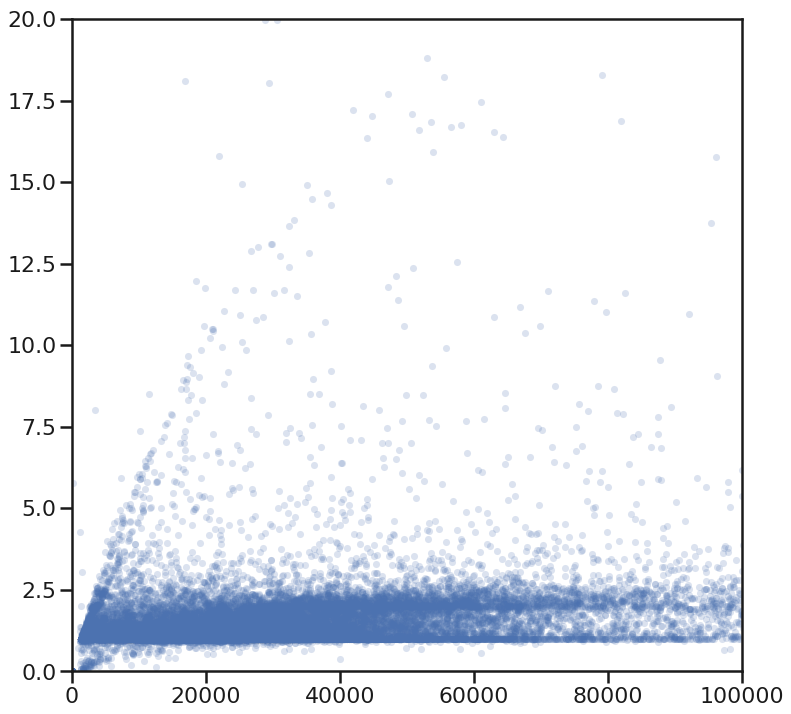

In [25]:
X = np.array(sample[[ 'SALDO_PROMEDIO' ,'ROTACION_CARTERA']] )
plt.scatter(*X.T, s=50, linewidth=0, c='b', alpha=0.2)
plt.ylim(0,20)
plt.xlim(0,100000)

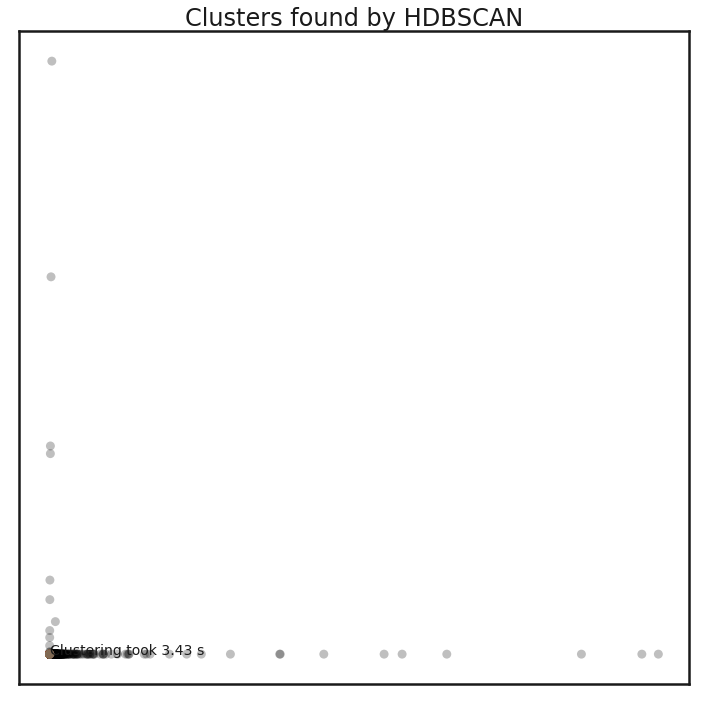

In [26]:
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':220})

In [120]:
#X = np.array(sample[[ 'SALDO_PROMEDIO' ,'ROTACION_CARTERA']] )

# Estandarización
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X) 

In [5]:
import hdbscan
X = np.array(sample[['DAÑOS','RECLAMOS', 'QUEJAS', 'CORTES', 'SALDO_PROMEDIO' ,'ROTACION_CARTERA']] )
clusterer = hdbscan.HDBSCAN(min_cluster_size=15  ).fit(X) 
palette = sns.color_palette('deep', np.unique(clusterer.labels_).max() + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_] 


Text(0.5,1,'HDBSCAN')

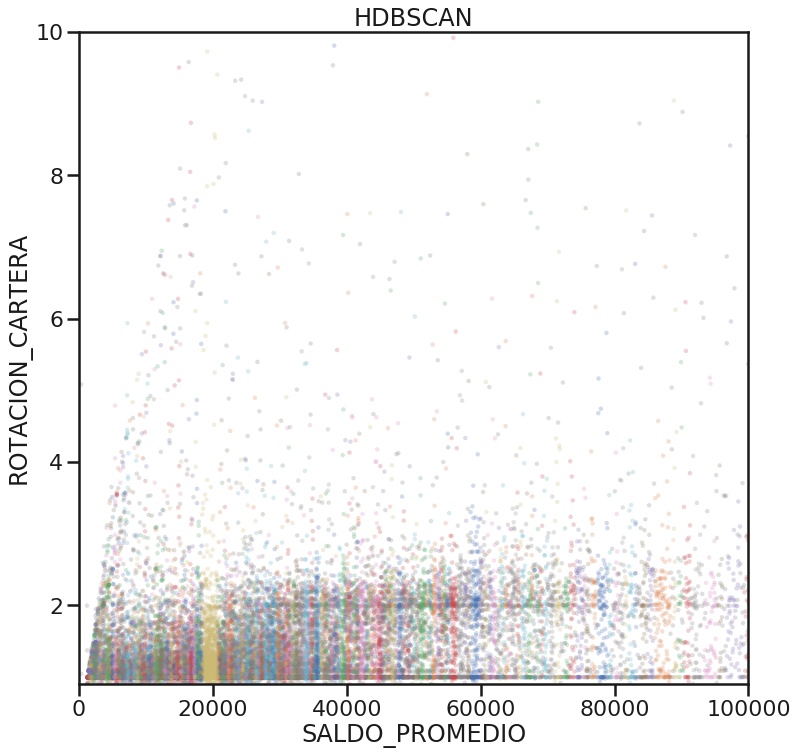

In [9]:
plt.scatter( X.T[4] , X.T[5], s=20, linewidth=0, c=colors, alpha=0.25)
plt.ylim(0.9,10)
plt.xlim(0,100000)
plt.xlabel('SALDO_PROMEDIO' ) #4
plt.ylabel('ROTACION_CARTERA') 
plt.title('HDBSCAN')

Text(0.5,0,'Z CORTES')

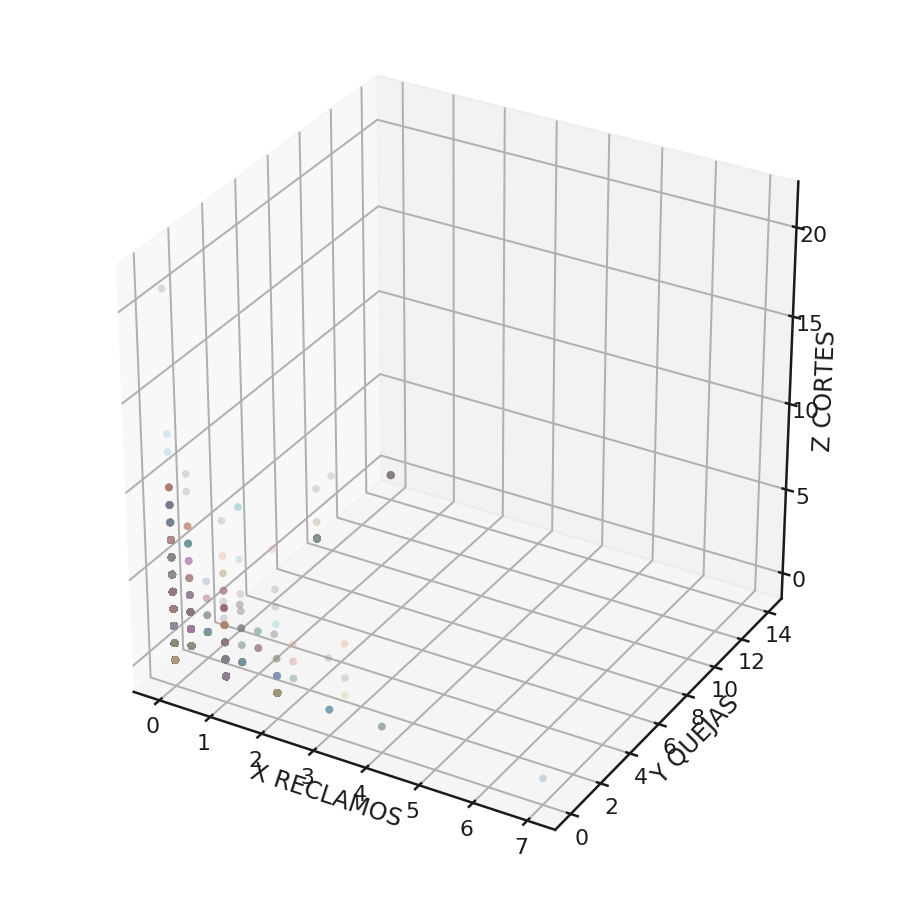

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) 
 

ax.scatter( X.T[1] , X.T[2] , X.T[3]  , s=60, linewidth=0, c=colors, alpha=0.25) 
ax.set_xlabel('X RECLAMOS')
ax.set_ylabel('Y QUEJAS')
ax.set_zlabel('Z CORTES')

#ax.set_zlim(0 , 20)

## Coordenadas paralelas 

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


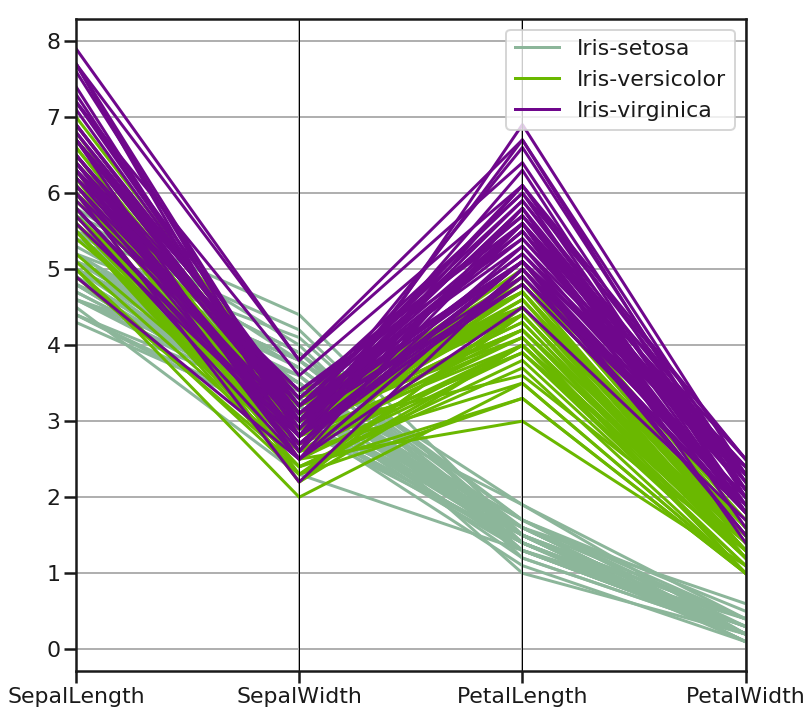

In [16]:
from pandas import read_csv
from pandas.tools.plotting import parallel_coordinates
from matplotlib import pyplot as plt
df = read_csv('https://raw.github.com/pandas-dev/pandas/master'
              '/pandas/tests/data/iris.csv')
parallel_coordinates(df, 'Name')
plt.show()

In [ ]:
## datos escalados
#plt.xlim(0,100000)
#plt.ylim(0.9,5)

#plt.xlim(0,0.020)
#plt.ylim(-0.01200,0)

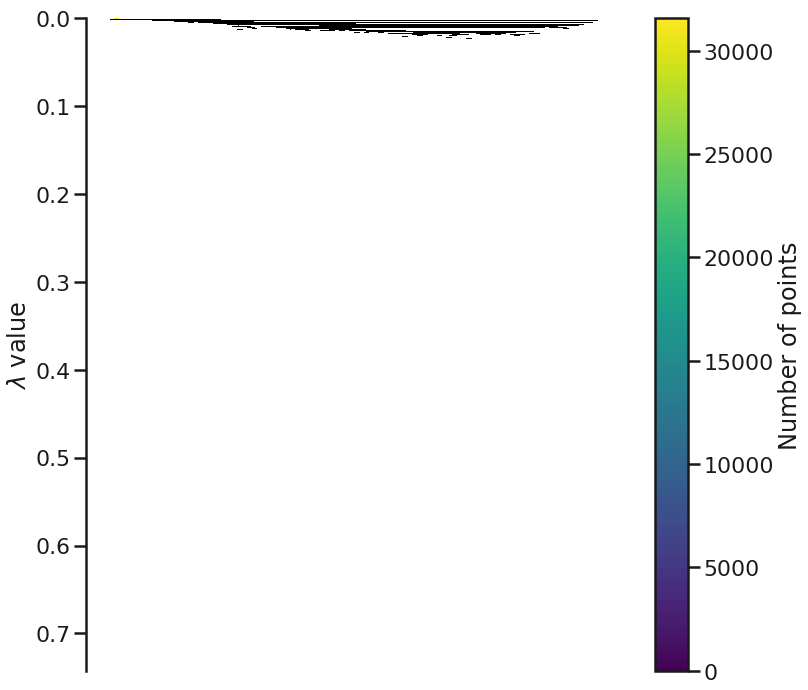

In [65]:
clusterer.condensed_tree_.plot()

In [ ]:
X = np.array(sample[[ 'SALDO_PROMEDIO' ,'ROTACION_CARTERA']] )

# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X) 

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=69).fit(X) 
palette = sns.color_palette('deep', np.unique(clusterer.labels_).max() + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_] 
plt.scatter(*X.T, s=50, linewidth=0, c=colors, alpha=0.25)
#plt.xlim(0,100000)
#plt.ylim(0.9,5)

plt.xlim(0,0.010)
plt.ylim(-0.01200,0)
plt.ylabel('SALDO_PROMEDIO' )
plt.xlabel('FACTURACION_PROMEDIO')
plt.title('HDBSCAN')